# (Ford GoBike System Data)
## by (Mahmoud Momen)

## Investigation Overview

The goal is to determine What is the age of users that have the highest frequency? and trip durations?, the number of users of each gender, determining the duration trip difference of each gender, and the average duration trip of each gender in each day. 

## Dataset Overview

This report looks at a set of data that contains information about individual trips taken in a bike-sharing system that covers San Francisco (2019).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['Age'] = df['member_birth_year'].fillna(0).astype(int)
df['member_birth_year']=2019.0-df['member_birth_year']
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,35.0,Male,No,1984
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,47.0,Male,No,1972
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,30.0,Other,No,1989
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45.0,Male,Yes,1974


In [4]:
df['start_day'] = df.start_time.dt.weekday 


In [5]:
df['duration_minutes'] = df['duration_sec']/60


In [6]:
#function for some distributions
def MyHistPlot(df,xvar,bins=30,figsize=[14,6]):

    df[xvar].hist(bins=bins, grid=False, edgecolor='black', figsize=figsize);
    xvar=xvar.replace('_',' ')

    plt.title(f'{xvar}'.title(), fontsize=14, weight = 'bold')

    plt.xlabel(xvar.title(), fontsize = 10, weight='bold')

    plt.ylabel('Frequency'.title(),fontsize=10, weight= 'bold')

In [7]:
#another function for count plots
def MyCountPlot(df,yvar,font_scale=1.4, rot=0):

    df[yvar].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)


    plt.title(f'{yvar}'.title(), fontsize=14, weight = 'bold')

    plt.ylabel("no. of People", labelpad=14)


#### What is the age of users that have the highest frequency?

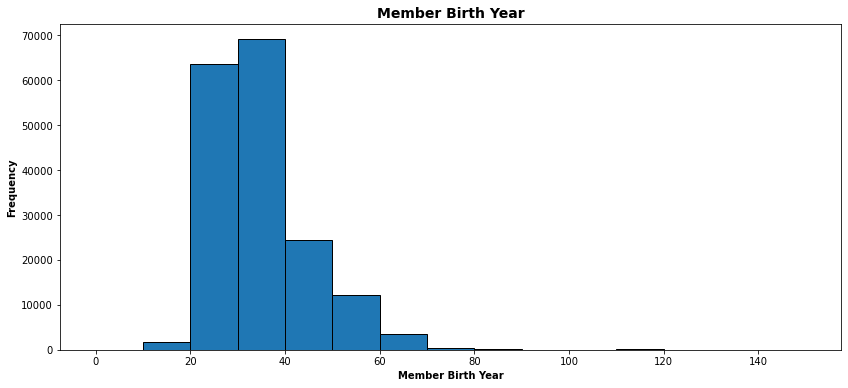

In [8]:
bins = np.arange(0,df['member_birth_year'].max()+10,10)

MyHistPlot(df,'member_birth_year',bins=bins)

#### which gender has the highest trip duration?

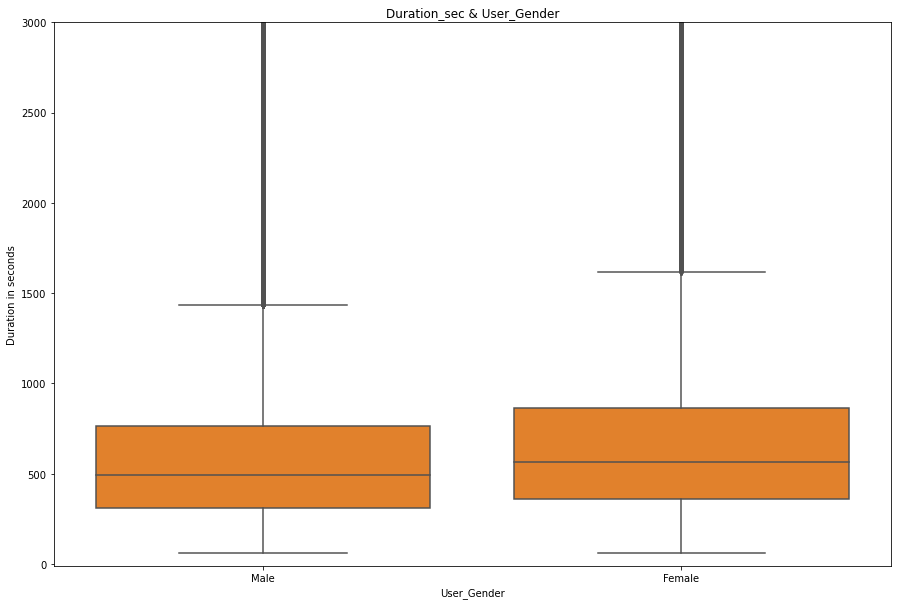

In [9]:
df.drop(df[df['member_gender'] == 'Other'].index, inplace = True)

plt.figure(figsize = [15, 10])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Duration_sec & User_Gender')
plt.xlabel('User_Gender')
plt.ylabel('Duration in seconds')
plt.show()


#### The females's trip durations are slightly longer than the males's trip.


#### What is the average of trip duration of each gender in each day?

In [10]:
day_order=['Monday' , 'Tuesday' ,'Wednesday' , 'Thursday' , 'Friday' ,  'Saturday' , 'Sunday']
df['start_day'] = df.start_time.dt.weekday 


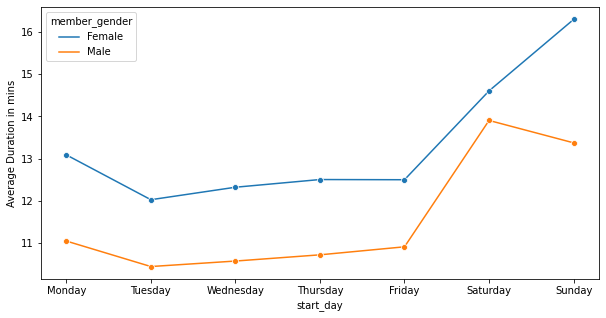

In [11]:
df.drop(df[df['member_gender'] == 'Other'].index, inplace = True)

gender_avg_dist_day = df.groupby(['member_gender','start_day']).duration_minutes.mean()
gender_avg_dist_day = gender_avg_dist_day.reset_index()


plt.figure(figsize=[10,5])
sb.lineplot(data = gender_avg_dist_day, x='start_day', y='duration_minutes', hue='member_gender', marker='o')
plt.xticks(np.arange(0,7), day_order)
plt.ylabel('Average Duration in mins');

Averagely, the females ride more than males at the start of each day.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [14]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --ServePostProcessor.port=8910 --post serve


[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 648163 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Momens\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Momens\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Momens\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Momens\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Momens\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
 